# voxTrace Interface

To create an environment use:

        conda create --name vt python=3 xraylib=4.1.3 jupyter ipykernel matplotlib h5py pandas -c conda-forge

        conda activate vt

## UI

### Create Sample

In [9]:
import os
import numpy as np
import h5py as h5p
import xraylib as xrl
import pandas as pd
from matplotlib import pyplot as plt
import re

current_path = os.getcwd()

In [12]:
# Define sample size and voxel size
sample_size = np.array([600., 600., 200.]) # in units of micrometers
voxel_size = np.array([5.0, 5.0, 5.0]) # in units of micrometers

# Calculate number of voxels in each dimension
num_voxels = np.ceil(sample_size / voxel_size).astype(int)

In [10]:
# Define materials NIST_1107
materials = [
    {
        "z_range": (0, 300),
        "elements": [26, 28, 29, 30, 50, 82],
        "mass_fractions": [0.0004, 0.0010, 0.6119, 0.3741, 0.0107, 0.0019]
    }
]

# path to test-data measurement file
path_start = current_path + "/test-data/simulation/nist-1107"

In [13]:
# Define materials Triple-Cross
materials = [
    {
        "z_range": (0, 50),
        "elements": [6,24],
        "mass_fractions": [0.999651886257307,0.00034811374269286]
    },
    {
        "z_range": (50, 100),
        "elements": [6,27],
        "mass_fractions": [0.999543658490524,0.000456341509475796]
    },
    {
        "z_range": (100, 150),
        "elements": [6,30],
        "mass_fractions": [0.999378760356556,0.000621239643443875]
    },
    {
        "z_range": (150, 200),
        "elements": [6],
        "mass_fractions": [1.0]
    }
]

# path to test-data measurement file
path_start = current_path + "/test-data/simulation/triple-cross"

In [14]:
# Write output to text file
with open(path_start+"/Materials.txt", "w") as f:
    # Write header
    f.write("# Materials\n")
    for i in range(np.prod(num_voxels)):
        # Write point information
        x, y, z = np.unravel_index(i, num_voxels)
        for material in materials:
            if material["z_range"][0]/voxel_size[2] <= z < material["z_range"][1]/voxel_size[2]:
                f.write("# Point {}\n".format(i+1))
                f.write("{}, {}, {} \t\t\t\t\t\t\t\t\t\t # x,y,z \n".format(x, y, z))
                f.write("{} \t\t\t\t\t\t\t\t\t\t\t\t # Number of Elements\n".format(len(material["elements"]))) # number of elements
                f.write("{} \t\t\t\t\t\t\t # Elements Z\n".format(", ".join(map(str, material["elements"])))) # elements Z
                f.write("{} \t # Element Mass Fractions\n \n".format(", ".join(map(str, material["mass_fractions"])))) # elements mass fraction
                break

### Measurement Data

#### NIST-1107

In [14]:
# path to test-data measurement file
file_loc_1  = current_path + "/test-data/measurement/nist-1107/nist-1107-depth-00-00.txt"
file_loc_2  = current_path + "/test-data/measurement/nist-1107/nist-1107-depth-00-01.txt"
file_loc_3  = current_path + "/test-data/measurement/nist-1107/nist-1107-depth-01-00.txt"

# Read the file into a pandas dataframe
df_1 = pd.read_csv(file_loc_1, sep='\t', skiprows=7, header=None, names=["Motor-samplexraw", "Motor-sampleyraw", "Motor-samplex", "Motor-sampley", "Motor-samplez", "Motor-cap1x", "Motor-cap1y", "Motor-cap1z", "Motor-cap1yaw", "Motor-cap1pitch", "Motor-detectorx", "Motor-detectory", "Motor-detectorz", "Motor-mic", "Motor-th", "Motor-ml", "px5.Mo-Ka-Gro[1554,1628]", "px5.Mo-Ka-Net[1554,1628]", "px5.Ni-Ka-Gro[670,695]", "px5.Ni-Ka-Net[670,695]", "px5.Cu-Ka-Gro[708,755]", "px5.Cu-Ka-Net[708,755]", "px5.Fe-Ka-Gro[575,595]", "px5.Fe-Ka-Net[575,595]", "px5.Zn-Ka-Gro[770,800]", "px5.Zn-Ka-Net[770,800]", "px5.Sn-L-Gro[306,350]", "px5.Sn-L-Net[306,350]", "px5.Pb-L-Gro[1107,1173]", "px5.Pb-L-Net[1107,1173]", "px5.Realtime", "px5.Livetime", "px5.Deadtime", "px5.icr", "px5.ocr", "miccam.AvgR", "miccam.AvgG", "miccam.AvgB", "tube.Voltage", "tube.Current", "px5.Filename"])
df_2 = pd.read_csv(file_loc_2, sep='\t', skiprows=7, header=None, names=["Motor-samplexraw", "Motor-sampleyraw", "Motor-samplex", "Motor-sampley", "Motor-samplez", "Motor-cap1x", "Motor-cap1y", "Motor-cap1z", "Motor-cap1yaw", "Motor-cap1pitch", "Motor-detectorx", "Motor-detectory", "Motor-detectorz", "Motor-mic", "Motor-th", "Motor-ml", "px5.Mo-Ka-Gro[1554,1628]", "px5.Mo-Ka-Net[1554,1628]", "px5.Ni-Ka-Gro[670,695]", "px5.Ni-Ka-Net[670,695]", "px5.Cu-Ka-Gro[708,755]", "px5.Cu-Ka-Net[708,755]", "px5.Fe-Ka-Gro[575,595]", "px5.Fe-Ka-Net[575,595]", "px5.Zn-Ka-Gro[770,800]", "px5.Zn-Ka-Net[770,800]", "px5.Sn-L-Gro[306,350]", "px5.Sn-L-Net[306,350]", "px5.Pb-L-Gro[1107,1173]", "px5.Pb-L-Net[1107,1173]", "px5.Realtime", "px5.Livetime", "px5.Deadtime", "px5.icr", "px5.ocr", "miccam.AvgR", "miccam.AvgG", "miccam.AvgB", "tube.Voltage", "tube.Current", "px5.Filename"])
df_3 = pd.read_csv(file_loc_3, sep='\t', skiprows=7, header=None, names=["Motor-samplexraw", "Motor-sampleyraw", "Motor-samplex", "Motor-sampley", "Motor-samplez", "Motor-cap1x", "Motor-cap1y", "Motor-cap1z", "Motor-cap1yaw", "Motor-cap1pitch", "Motor-detectorx", "Motor-detectory", "Motor-detectorz", "Motor-mic", "Motor-th", "Motor-ml", "px5.Mo-Ka-Gro[1554,1628]", "px5.Mo-Ka-Net[1554,1628]", "px5.Ni-Ka-Gro[670,695]", "px5.Ni-Ka-Net[670,695]", "px5.Cu-Ka-Gro[708,755]", "px5.Cu-Ka-Net[708,755]", "px5.Fe-Ka-Gro[575,595]", "px5.Fe-Ka-Net[575,595]", "px5.Zn-Ka-Gro[770,800]", "px5.Zn-Ka-Net[770,800]", "px5.Sn-L-Gro[306,350]", "px5.Sn-L-Net[306,350]", "px5.Pb-L-Gro[1107,1173]", "px5.Pb-L-Net[1107,1173]", "px5.Realtime", "px5.Livetime", "px5.Deadtime", "px5.icr", "px5.ocr", "miccam.AvgR", "miccam.AvgG", "miccam.AvgB", "tube.Voltage", "tube.Current", "px5.Filename"])

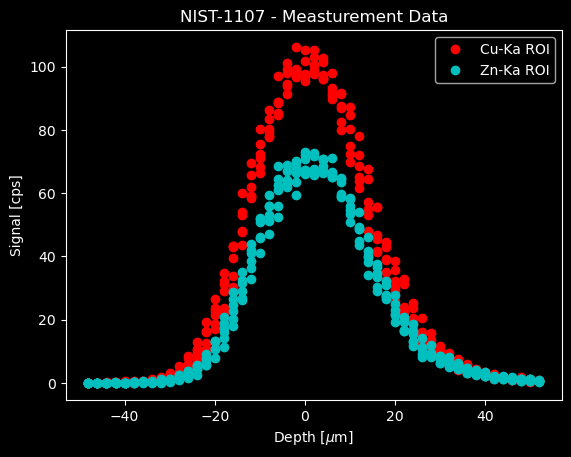

In [15]:
# find position of maximum signal df_3["px5.Cu-Ka-Gro[708,755]"]
max_pos = df_3["px5.Cu-Ka-Gro[708,755]"].idxmax()
max_corr= df_3["Motor-samplex"][max_pos]+2

# Plot the data
plt.ylabel("Signal [cps]")
plt.xlabel("Depth [$\mu$m]")
plt.plot(df_3["Motor-samplex"]-max_corr,df_3["px5.Cu-Ka-Gro[708,755]"]/df_3["px5.Livetime"],'ro',label='Cu-Ka ROI')
plt.plot(df_3["Motor-samplex"]-max_corr,df_3["px5.Zn-Ka-Gro[770,800]"]/df_3["px5.Livetime"],'co',label='Zn-Ka ROI')
#plt.plot(myrange1, cu_faltung,'y',label='Cu-Ka')
#plt.plot(myrange1, zn_faltung,'g',label='Zn-Ka')
plt.legend()
plt.title('NIST-1107 - Measturement Data')
plt.show()

#### Triple-Cross-Structure

In [18]:
file_loc_4 = current_path + '/test-data/measurement/triple-cross/Cr-Co-Zn-Kreuze-auf-pure-v15-depth-02.txt'

# Read the file into a pandas dataframe
df_4 = pd.read_csv(file_loc_4, sep='\t', skiprows=8, header=None, names=["Motor-samplexraw","Motor-sampleyraw","Motor-samplex","Motor-sampley","Motor-samplez","Motor-cap1x","Motor-cap1y","Motor-cap1z","Motor-cap1yaw","Motor-cap1pitch","Motor-detectorx","Motor-detectory","Motor-detectorz","Motor-mic","px5.Gd-La-Gro[525,566]","px5.Gd-La-Net[525,566]","px5.Cu-Ka-Gro[673,763]","px5.Cu-Ka-Net[673,763]","px5.Cu-Kb-Gro[799,846]","px5.Cu-Kb-Net[799,846]","px5.Fe-Ka-Gro[560,613]","px5.Fe-Ka-Net[560,613]","px5.Fe-Kb-Gro[615,671]","px5.Fe-Kb-Net[615,671]","px5.Cr-Ka-Gro[459,521]","px5.Cr-Ka-Net[459,521]","px5.Cr-Kb-Gro[519,560]","px5.Cr-Kb-Net[519,560]","px5.Zn-Ka-Gro[763,799]","px5.Zn-Ka-Net[763,799]","px5.Zn-Kb-Gro[840,908]","px5.Zn-Kb-Net[840,908]","px5.Sn-L-Gro[292,402]","px5.Sn-L-Net[292,402]","px5.Co-Ka-Gro[600,656]","px5.Co-Ka-Net[600,656]","px5.Realtime","px5.Livetime","px5.Deadtime","px5.icr","px5.ocr","tube.Voltage","tube.Current","px5.Filename"])

In [20]:
# create list with int entries from 0 to n_files-1 
#myrange1 = [i*15-45-10 for i in range(n_files)]

# find position of maximum signal df_3["px5.Cu-Ka-Gro[708,755]"]
max_pos = df_1["px5.Cr-Ka-Gro[459,521]"].idxmax()
max_corr= df_1["Motor-samplex"][max_pos]-10

# Plot the data
plt.ylabel("Signal [cps]")
plt.xlabel("Depth [$\mu$m]")
plt.plot(df_1["Motor-samplex"]-max_corr,df_1["px5.Cr-Ka-Gro[459,521]"]/df_1["px5.Livetime"],'ro',label='Cr-Ka ROI Measured')
plt.plot(df_1["Motor-samplex"]-max_corr,df_1["px5.Co-Ka-Gro[600,656]"]/df_1["px5.Livetime"],'go',label='Co-Ka ROI Measured')
plt.plot(df_1["Motor-samplex"]-max_corr,df_1["px5.Zn-Ka-Gro[763,799]"]/df_1["px5.Livetime"],'bo',label='Zn-Ka ROI Measured')
#plt.plot(myrange1, cr_faltung,'r',label='Cr-Ka Simulated')
#plt.plot(myrange1, co_faltung,'g',label='Co-Ka Simulated')
#plt.plot(myrange1, zn_faltung,'b',label='Zn-Ka Simulated')
plt.legend()
plt.title('Triple-Cross- Measturement Data')
plt.show()

KeyError: 'px5.Cr-Ka-Gro[459,521]'

## Work in Progress

### NIST-1107

In [9]:
# list all files in directory
directory = "/media/miro/Data-1TB/simulation/nist-1107/post-sample"
directory_2 = "/media/miro/Data-1TB/simulation/nist-1107/detector"

files = os.listdir(directory)
files_2 = os.listdir(directory_2)

files = sorted(files, key=lambda x: float(x.split('--z-')[1].split(').h5')[0]))
files_2 = sorted(files_2, key=lambda x: float(x.split('--z-')[1].split(').h5')[0]))

files = [os.path.join(directory, file) for file in files]
files_2 = [os.path.join(directory_2, file) for file in files_2]

n_files = len(files)

energies = []
respawns = []
respawns_sum = []

energies_2 = []
probs_2 = []
probs_2_sum = []

for i in range(n_files):
    energies.append(h5p.File(files[i], 'r')['my_data'][10] / 50677300.0)
    respawns.append(h5p.File(files[i], 'r')['my_data'][20])
    respawns_sum.append(h5p.File(files[i], 'r')['my_data'][20].sum())

    energies_2.append(h5p.File(files_2[i], 'r')['my_data'][10] / 50677300.0)
    probs_2.append(h5p.File(files_2[i], 'r')['my_data'][18])
    probs_2_sum.append(h5p.File(files_2[i], 'r')['my_data'][18].sum())

energies_respawns = []
energies_probs = []

for i in range(n_files):
    energies_respawns.append(np.array([energies[i], respawns[i]]).transpose())
    energies_probs.append(np.array([energies_2[i], probs_2[i]]).transpose())

# Define the number of bins and the range of energies
my_bins = 2048
my_range = (-0.1718, 22.6634)

# Create the bin edges
bin_edges = np.linspace(start=my_range[0], stop=my_range[1], num=my_bins+1)


In [10]:
post_sample_energy_hists = []
post_sample_respawn_hists = []

detector_energy_hists = []
detector_prob_hists = []

for i in range(n_files):
    energy_respawn = energies_respawns[i]
    energy, respawn = zip(*energy_respawn)

    histograms_1 = np.zeros(my_bins)
    histograms_2 = np.zeros(my_bins)

    post_sample_energy_hists.append(np.zeros(my_bins))
    post_sample_respawn_hists.append(np.zeros(my_bins))

    detector_energy_hists.append(np.zeros(my_bins))
    detector_prob_hists.append(np.zeros(my_bins))

    for energy, respawn in energy_respawn:
        bin_index = np.digitize([energy], bin_edges)[0] - 1
        post_sample_energy_hists[i][bin_index] += 1
        post_sample_respawn_hists[i][bin_index] += respawn

    en_prob = energies_probs[i]
    en, prob = zip(*en_prob)

    for en, prob in en_prob:
        bin_index = np.digitize([en], bin_edges)[0] - 1
        detector_energy_hists[i][bin_index] += 1
        detector_prob_hists[i][bin_index] += prob

In [11]:
histogramm_list = []
cu = []
zn = []
tot = []

cu_2 = []
zn_2 = []
tot_2 = []

cu_respawn = []
zn_respawn = []
tot_respawn = []

cu_prob = []
zn_prob = []
tot_prob = []

cu_faltung = []
zn_faltung = []
tot_faltung = []

ps_ratio = []

for i in range(0, n_files):
    # Make a HistogrammList of energies[1] with 2048 bins and a bin width of 0.01115 and an offset of -0.1718 and store it as array
    #histogramm = np.histogram(energies_2[i], bins=2048, range=(-0.1718, 22.6634))
    #histogramm_list.append(histogramm)

    # make sum of channels [708,755] and [756,803] and store it as array
    cu.append(np.sum(post_sample_energy_hists[i][708:755])) #/respawns[i] *6000000.
    zn.append(np.sum(post_sample_energy_hists[i][756:803])) #/respawns[i] *6000000.
    tot.append(np.sum(post_sample_energy_hists[i][0:2048])) #/respawns[i]
    #zn.append(np.sum(histogramm[0][756:803])/respawns_sum[i]) #/respawns[i] *6000000.
    #tot.append(np.sum(histogramm[0][0:2048])/respawns_sum[i]) #/respawns[i]

    cu_respawn.append(np.sum(post_sample_respawn_hists[i][708:755]))
    zn_respawn.append(np.sum(post_sample_respawn_hists[i][756:803]))
    tot_respawn.append(np.sum(post_sample_respawn_hists[i][0:2048]))

    cu_prob.append(np.sum(detector_prob_hists[i][708:755]))#/np.sum(detector_energy_hists[i][708:755])
    zn_prob.append(np.sum(detector_prob_hists[i][756:803]))#/np.sum(detector_energy_hists[i][756:803])
    tot_prob.append(np.sum(detector_prob_hists[i][0:2048]))#/np.sum(detector_energy_hists[i][0:2048])

    cu_faltung.append(np.sum(detector_energy_hists[i][708:755])/np.sum(post_sample_respawn_hists[i][0:2048])*10000000.)
    zn_faltung.append(np.sum(detector_energy_hists[i][756:803])/np.sum(post_sample_respawn_hists[i][0:2048])*10000000.)
    tot_faltung.append(np.sum(detector_energy_hists[i][0:2048])/np.sum(post_sample_respawn_hists[i][0:2048]))

    cu_2.append(np.sum(detector_energy_hists[i][708:755]))#*np.exp(-(i-20)*0.1)*10e6
    zn_2.append(np.sum(detector_energy_hists[i][756:803]))
    tot_2.append(np.sum(detector_energy_hists[i][0:2048]))
    
    ps_ratio.append(cu_2[i]/cu[i])

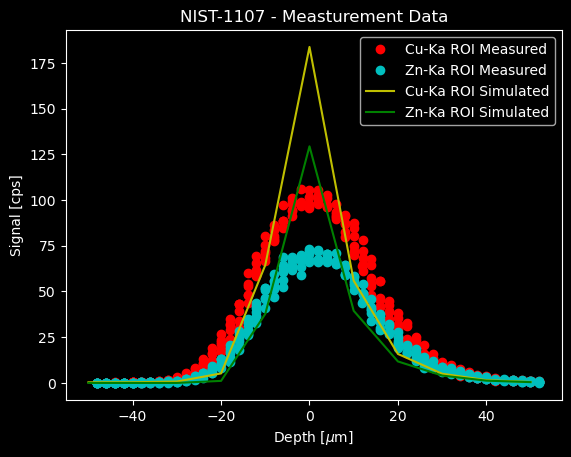

In [13]:
# create list with int entries from 0 to n_files-1 
myrange1 = [i*10-50 for i in range(n_files)]

# find position of maximum signal df_3["px5.Cu-Ka-Gro[708,755]"]
max_pos = df_3["px5.Cu-Ka-Gro[708,755]"].idxmax()
max_corr= df_3["Motor-samplex"][max_pos]+2

# Plot the data
plt.ylabel("Signal [cps]")
plt.xlabel("Depth [$\mu$m]")
plt.plot(df_3["Motor-samplex"]-max_corr,df_3["px5.Cu-Ka-Gro[708,755]"]/df_3["px5.Livetime"],'ro',label='Cu-Ka ROI Measured')
plt.plot(df_3["Motor-samplex"]-max_corr,df_3["px5.Zn-Ka-Gro[770,800]"]/df_3["px5.Livetime"],'co',label='Zn-Ka ROI Measured')
plt.plot(myrange1, cu_faltung,'y',label='Cu-Ka ROI Simulated')
plt.plot(myrange1, zn_faltung,'g',label='Zn-Ka ROI Simulated')
plt.legend()
plt.title('NIST-1107 - Measturement Data')
plt.show()

In [14]:
# new list with each element of cu_faltung divided by the corresponding element of zn_faltung
mylist = [x/y for x, y in zip(cu_faltung, zn_faltung)]
myList2 = df_3["px5.Cu-Ka-Gro[708,755]"].tolist() 
mylist3= df_3["px5.Zn-Ka-Gro[770,800]"].tolist()

#divide each element of mylist2 by the corresponding element of mylist3
mylist4 = [x / (y+1) for x, y in zip(myList2, mylist3)]

/tmp/ipykernel_40978/4206152641.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  mylist = [x/y for x, y in zip(cu_faltung, zn_faltung)]


Text(0.5, 1.0, 'NIST-1107')

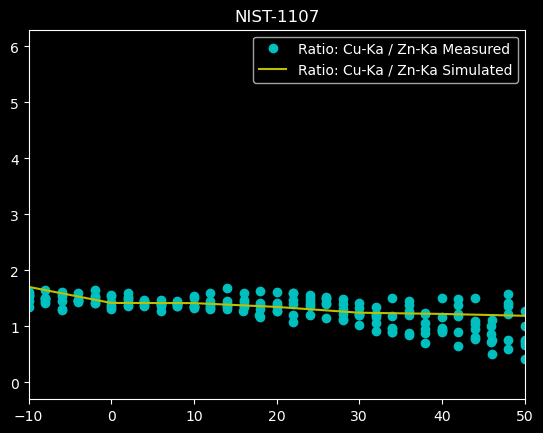

In [20]:
plt.plot(df_3["Motor-samplex"]-max_corr,mylist4,'co',label='Ratio: Cu-Ka / Zn-Ka Measured')
plt.plot(myrange1, mylist,'y',label='Ratio: Cu-Ka / Zn-Ka Simulated')
# change plot range
plt.xlim(-10, 50)
plt.legend()
plt.title('NIST-1107')

In [41]:

myList2 = df_3["px5.Cu-Ka-Gro[708,755]"].tolist() 
mylist3= df_3["px5.Zn-Ka-Gro[770,800]"].tolist()
#divide each element of mylist2 by the corresponding element of mylist3
mylist4 = [x / (y+1) for x, y in zip(myList2, mylist3)]

### Triple-Cross

In [21]:
# list all files in directory
directory = "/media/miro/Data-1TB/simulation/triple-cross/post-sample"
directory_2 = "/media/miro/Data-1TB/simulation/triple-cross/detector"

files = os.listdir(directory)
files_2 = os.listdir(directory_2)

files = sorted(files, key=lambda x: float(x.split('--z-')[1].split(').h5')[0]))
files_2 = sorted(files_2, key=lambda x: float(x.split('--z-')[1].split(').h5')[0]))

files = [os.path.join(directory, file) for file in files]
files_2 = [os.path.join(directory_2, file) for file in files_2]

In [22]:
# find files in directory
directory = "/media/miro/Data-1TB/nist-1107-simulation/post-sample-16/"
directory_2 = "/media/miro/Data-1TB/nist-1107-simulation/detector-16/"

files = [os.path.join(directory, file) for file in os.listdir(directory)]
files_2 = [os.path.join(directory_2, file) for file in os.listdir(directory_2)]

files.sort(key=lambda x: float(x.split('pos-(')[1].split(').h5')[0]))        
files_2.sort(key=lambda x: float(x.split('pos-(')[1].split(')-detector.h5')[0]))

#print(files)
#print(files_2)

In [23]:
n_files = len(files)

energies = []
respawns = []
respawns_sum = []

energies_2 = []
probs_2 = []
probs_2_sum = []

for i in range(n_files):
    energies.append(h5p.File(files[i], 'r')['my_data'][10] / 50677300.0)
    respawns.append(h5p.File(files[i], 'r')['my_data'][20])
    respawns_sum.append(h5p.File(files[i], 'r')['my_data'][20].sum())

    energies_2.append(h5p.File(files_2[i], 'r')['my_data'][10] / 50677300.0)
    probs_2.append(h5p.File(files_2[i], 'r')['my_data'][18])
    probs_2_sum.append(h5p.File(files_2[i], 'r')['my_data'][18].sum())

energies_respawns = []
energies_probs = []

for i in range(n_files):
    energies_respawns.append(np.array([energies[i], respawns[i]]).transpose())
    energies_probs.append(np.array([energies_2[i], probs_2[i]]).transpose())

In [24]:
len(energies[0])

30000

In [25]:
# Define the number of bins and the range of energies
my_bins = 2048
my_range = (-0.1718, 22.6634)

# Create the bin edges
bin_edges = np.linspace(start=my_range[0], stop=my_range[1], num=my_bins+1)

post_sample_energy_hists = []
post_sample_respawn_hists = []

detector_energy_hists = []
detector_prob_hists = []

for i in range(n_files):
    energy_respawn = energies_respawns[i]
    energy, respawn = zip(*energy_respawn)

    histograms_1 = np.zeros(my_bins)
    histograms_2 = np.zeros(my_bins)

    post_sample_energy_hists.append(np.zeros(my_bins))
    post_sample_respawn_hists.append(np.zeros(my_bins))

    detector_energy_hists.append(np.zeros(my_bins))
    detector_prob_hists.append(np.zeros(my_bins))

    for energy, respawn in energy_respawn:
        bin_index = np.digitize([energy], bin_edges)[0] - 1
        post_sample_energy_hists[i][bin_index] += 1
        post_sample_respawn_hists[i][bin_index] += respawn

    en_prob = energies_probs[i]
    en, prob = zip(*en_prob)

    for en, prob in en_prob:
        bin_index = np.digitize([en], bin_edges)[0] - 1
        detector_energy_hists[i][bin_index] += 1
        detector_prob_hists[i][bin_index] += prob

In [26]:
histogramm_list = []
cr = []
co = []
zn = []
tot = []

cr_2 = []
co_2 = []
zn_2 = []
tot_2 = []

cr_respawn = []
co_respawn = []
zn_respawn = []
tot_respawn = []

cr_prob = []
co_prob = []
zn_prob = []
tot_prob = []

cr_faltung = []
co_faltung = []
zn_faltung = []
tot_faltung = []

for i in range(0, n_files):
    cr.append(np.sum(post_sample_energy_hists[i][459:521]))
    co.append(np.sum(post_sample_energy_hists[i][600:656]))
    zn.append(np.sum(post_sample_energy_hists[i][763:799]))
    tot.append(np.sum(post_sample_energy_hists[i][0:2048])) 

    cr_respawn.append(np.sum(post_sample_respawn_hists[i][459:521]))
    co_respawn.append(np.sum(post_sample_respawn_hists[i][600:656]))
    zn_respawn.append(np.sum(post_sample_respawn_hists[i][763:799]))
    tot_respawn.append(np.sum(post_sample_respawn_hists[i][0:2048]))

    cr_prob.append(np.sum(detector_prob_hists[i][459:521]))
    co_prob.append(np.sum(detector_prob_hists[i][600:656]))
    zn_prob.append(np.sum(detector_prob_hists[i][763:799]))
    tot_prob.append(np.sum(detector_prob_hists[i][0:2048]))

    cr_faltung.append(np.sum(detector_energy_hists[i][459:521])/np.sum(post_sample_respawn_hists[i][0:2048])*500000000000.)
    co_faltung.append(np.sum(detector_energy_hists[i][600:656])/np.sum(post_sample_respawn_hists[i][0:2048])*500000000000.)
    zn_faltung.append(np.sum(detector_energy_hists[i][763:799])/np.sum(post_sample_respawn_hists[i][0:2048])*500000000000.)
    tot_faltung.append(np.sum(detector_energy_hists[i][0:2048])/np.sum(post_sample_respawn_hists[i][0:2048]))

    cr_2.append(np.sum(detector_energy_hists[i][459:521]))
    co_2.append(np.sum(detector_energy_hists[i][600:656]))
    zn_2.append(np.sum(detector_energy_hists[i][763:799]))
    tot_2.append(np.sum(detector_energy_hists[i][0:2048]))

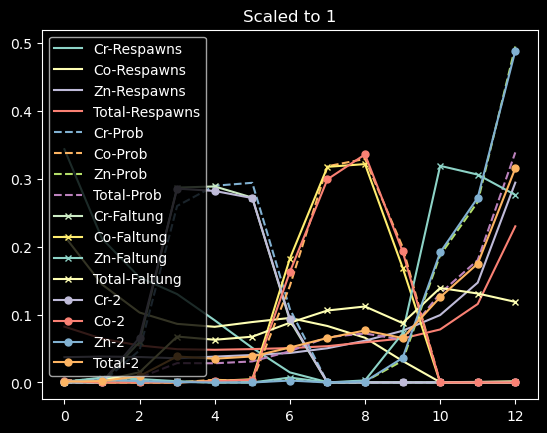

In [27]:
# plot cu_respawn and zn_respawn and tot_respawn and tot_respawn_2 scaled to 1
plt.plot(cr_respawn/np.sum(cr_respawn), label='Cr-Respawns')
plt.plot(co_respawn/np.sum(co_respawn), label='Co-Respawns')
plt.plot(zn_respawn/np.sum(zn_respawn), label='Zn-Respawns')
plt.plot(tot_respawn/np.sum(tot_respawn), label='Total-Respawns')

# plot cu_prob and zn_prob and tot_prob scaled to 1
plt.plot(cr_prob/np.sum(cr_prob), label='Cr-Prob',linestyle='--')
plt.plot(co_prob/np.sum(co_prob), label='Co-Prob',linestyle='--')
plt.plot(zn_prob/np.sum(zn_prob), label='Zn-Prob',linestyle='--')
plt.plot(tot_prob/np.sum(tot_prob), label='Total-Prob',linestyle='--')

# plot cu_faltung and zn_faltung and tot_faltung scaled to 1
plt.plot(cr_faltung/np.sum(cr_faltung), label='Cr-Faltung', marker='x', markersize=5)
plt.plot(co_faltung/np.sum(co_faltung), label='Co-Faltung', marker='x', markersize=5)
plt.plot(zn_faltung/np.sum(zn_faltung), label='Zn-Faltung', marker='x', markersize=5)
plt.plot(tot_faltung/np.sum(tot_faltung), label='Total-Faltung', marker='x', markersize=5)

# plot cu_2 and zn_2 and tot_2 scaled to 1
plt.plot(cr_2/np.sum(cr_2), label='Cr-2', marker='o', markersize=5)
plt.plot(co_2/np.sum(co_2), label='Co-2', marker='o', markersize=5)
plt.plot(zn_2/np.sum(zn_2), label='Zn-2', marker='o', markersize=5)
plt.plot(tot_2/np.sum(tot_2), label='Total-2', marker='o', markersize=5)

plt.legend()
plt.title('Scaled to 1')
plt.show()

In [82]:
# new list with each element of cu_faltung divided by the corresponding element of zn_faltung
mylist = [x/y for x, y in zip(cr_faltung, co_faltung)]
mylist2 = [x/y for x, y in zip(cr_faltung, zn_faltung)]
mylist3 = [x/y for x, y in zip(co_faltung, zn_faltung)]

mylist4= df_1["px5.Cr-Ka-Gro[459,521]"].tolist()
mylist5= df_1["px5.Co-Ka-Gro[600,656]"].tolist()
mylist6= df_1["px5.Zn-Ka-Gro[763,799]"].tolist()


#divide each element of mylist2 by the corresponding element of mylist3
mylist7 = [x / (y+1) for x, y in zip(mylist4, mylist5)]
mylist8 = [x / (y+1) for x, y in zip(mylist4, mylist6)]
mylist9 = [x / (y+1) for x, y in zip(mylist5, mylist6)]

/tmp/ipykernel_10537/484575186.py:2: RuntimeWarning: invalid value encountered in scalar divide
  mylist = [x/y for x, y in zip(cr_faltung, co_faltung)]
/tmp/ipykernel_10537/484575186.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  mylist = [x/y for x, y in zip(cr_faltung, co_faltung)]
/tmp/ipykernel_10537/484575186.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  mylist2 = [x/y for x, y in zip(cr_faltung, zn_faltung)]
/tmp/ipykernel_10537/484575186.py:3: RuntimeWarning: invalid value encountered in scalar divide
  mylist2 = [x/y for x, y in zip(cr_faltung, zn_faltung)]
/tmp/ipykernel_10537/484575186.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  mylist3 = [x/y for x, y in zip(co_faltung, zn_faltung)]


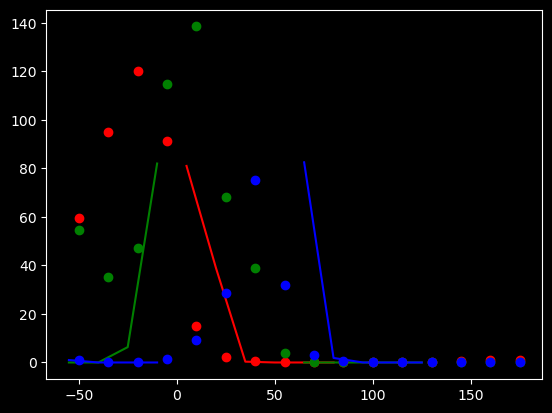

In [87]:
plt.plot(myrange1, mylist,'r',label='Cr-Ka/Co-Ka')
plt.plot(myrange1, mylist2,'g',label='Cr-Ka/Zn-Ka')
plt.plot(myrange1, mylist3,'b',label='Co-Ka/Zn-Ka')

plt.plot(df_1["Motor-samplex"]-max_corr,mylist7,'ro',label='Cr-Ka/Co-Ka')
plt.plot(df_1["Motor-samplex"]-max_corr,mylist8,'go',label='Cr-Ka/Zn-Ka')
plt.plot(df_1["Motor-samplex"]-max_corr,mylist9,'bo',label='Co-Ka/Zn-Ka')

In [30]:
file_loc_1 = '/media/miro/Data-1TB/nist-1107-measurement/nist-1107-depth-00-00/nist-1107-depth-00-00.txt'
file_loc_2 = '/media/miro/Data-1TB/nist-1107-measurement/nist-1107-depth-00-01/nist-1107-depth-00-01.txt'
file_loc_3 = '/media/miro/Data-1TB/nist-1107-measurement/nist-1107-depth-01-00/nist-1107-depth-01-00.txt'

# Read the file into a pandas dataframe
df_1 = pd.read_csv(file_loc_1, sep='\t', skiprows=7, header=None, names=["Motor-samplexraw", "Motor-sampleyraw", "Motor-samplex", "Motor-sampley", "Motor-samplez", "Motor-cap1x", "Motor-cap1y", "Motor-cap1z", "Motor-cap1yaw", "Motor-cap1pitch", "Motor-detectorx", "Motor-detectory", "Motor-detectorz", "Motor-mic", "Motor-th", "Motor-ml", "px5.Mo-Ka-Gro[1554,1628]", "px5.Mo-Ka-Net[1554,1628]", "px5.Ni-Ka-Gro[670,695]", "px5.Ni-Ka-Net[670,695]", "px5.Cu-Ka-Gro[708,755]", "px5.Cu-Ka-Net[708,755]", "px5.Fe-Ka-Gro[575,595]", "px5.Fe-Ka-Net[575,595]", "px5.Zn-Ka-Gro[770,800]", "px5.Zn-Ka-Net[770,800]", "px5.Sn-L-Gro[306,350]", "px5.Sn-L-Net[306,350]", "px5.Pb-L-Gro[1107,1173]", "px5.Pb-L-Net[1107,1173]", "px5.Realtime", "px5.Livetime", "px5.Deadtime", "px5.icr", "px5.ocr", "miccam.AvgR", "miccam.AvgG", "miccam.AvgB", "tube.Voltage", "tube.Current", "px5.Filename"])
df_2 = pd.read_csv(file_loc_2, sep='\t', skiprows=7, header=None, names=["Motor-samplexraw", "Motor-sampleyraw", "Motor-samplex", "Motor-sampley", "Motor-samplez", "Motor-cap1x", "Motor-cap1y", "Motor-cap1z", "Motor-cap1yaw", "Motor-cap1pitch", "Motor-detectorx", "Motor-detectory", "Motor-detectorz", "Motor-mic", "Motor-th", "Motor-ml", "px5.Mo-Ka-Gro[1554,1628]", "px5.Mo-Ka-Net[1554,1628]", "px5.Ni-Ka-Gro[670,695]", "px5.Ni-Ka-Net[670,695]", "px5.Cu-Ka-Gro[708,755]", "px5.Cu-Ka-Net[708,755]", "px5.Fe-Ka-Gro[575,595]", "px5.Fe-Ka-Net[575,595]", "px5.Zn-Ka-Gro[770,800]", "px5.Zn-Ka-Net[770,800]", "px5.Sn-L-Gro[306,350]", "px5.Sn-L-Net[306,350]", "px5.Pb-L-Gro[1107,1173]", "px5.Pb-L-Net[1107,1173]", "px5.Realtime", "px5.Livetime", "px5.Deadtime", "px5.icr", "px5.ocr", "miccam.AvgR", "miccam.AvgG", "miccam.AvgB", "tube.Voltage", "tube.Current", "px5.Filename"])
df_3 = pd.read_csv(file_loc_3, sep='\t', skiprows=7, header=None, names=["Motor-samplexraw", "Motor-sampleyraw", "Motor-samplex", "Motor-sampley", "Motor-samplez", "Motor-cap1x", "Motor-cap1y", "Motor-cap1z", "Motor-cap1yaw", "Motor-cap1pitch", "Motor-detectorx", "Motor-detectory", "Motor-detectorz", "Motor-mic", "Motor-th", "Motor-ml", "px5.Mo-Ka-Gro[1554,1628]", "px5.Mo-Ka-Net[1554,1628]", "px5.Ni-Ka-Gro[670,695]", "px5.Ni-Ka-Net[670,695]", "px5.Cu-Ka-Gro[708,755]", "px5.Cu-Ka-Net[708,755]", "px5.Fe-Ka-Gro[575,595]", "px5.Fe-Ka-Net[575,595]", "px5.Zn-Ka-Gro[770,800]", "px5.Zn-Ka-Net[770,800]", "px5.Sn-L-Gro[306,350]", "px5.Sn-L-Net[306,350]", "px5.Pb-L-Gro[1107,1173]", "px5.Pb-L-Net[1107,1173]", "px5.Realtime", "px5.Livetime", "px5.Deadtime", "px5.icr", "px5.ocr", "miccam.AvgR", "miccam.AvgG", "miccam.AvgB", "tube.Voltage", "tube.Current", "px5.Filename"])

In [39]:
# new list with each element of cu_faltung divided by the corresponding element of zn_faltung
mylist = [x/y for x, y in zip(cu_faltung, zn_faltung)]

/tmp/ipykernel_7307/2415953662.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  mylist = [x/y for x, y in zip(cu_faltung, zn_faltung)]


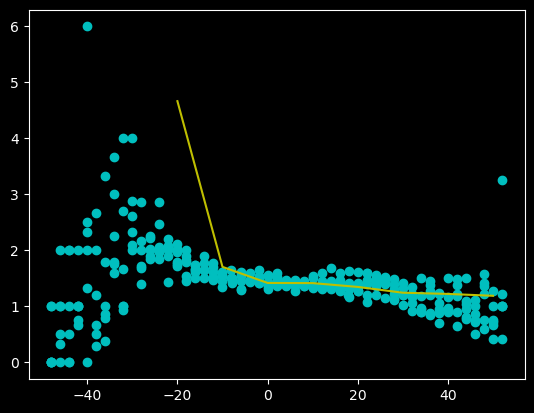

In [40]:
plt.plot(df_3["Motor-samplex"]-max_corr,mylist4,'co',label='Cu-Ka')
plt.plot(myrange1, mylist,'y',label='Cu-Ka')

#plt.plot(myrange1, zn_faltung,'g',label='Zn-Ka')

### Call the code

In [ ]:
os.popen('./build/bin/Test-3').read()